<a href="https://colab.research.google.com/github/PatricioGalaz/angular-bases/blob/main/detector_psd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="xL1ILC2Sxxnc1gy7EEcV")
project = rf.workspace("deteccion-wijx9").project("detecpsd")
version = project.version(1)
dataset = version.download("yolov11")





loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DetecPSD-1 in yolov11:: 100%|██████████| 458/458 [00:00<00:00, 2777.26it/s]


In [4]:
# Specify the path to the file
file_path = '/content/DetecPSD-1/data.yaml'

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file at {file_path} exists.")
else:
    print(f"The file at {file_path} does not exist.")

The file at /content/DetecPSD-1/data.yaml exists.


In [5]:
# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# List all files and directories in the current directory
files = os.listdir(cwd)
print(f"Files and directories in '{cwd}': {files}")


Current working directory: /content
Files and directories in '/content': ['.config', 'DetecPSD-1', 'sample_data']


In [6]:
dir_path = cwd + "/sample_data"
for files in os.listdir(dir_path):
  os.remove(dir_path + "/" + files)
os.rmdir(dir_path)

In [7]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")
model.info()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.0M/49.0M [00:00<00:00, 124MB/s]


YOLO11l summary: 357 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(357, 25372160, 0, 87.6134912)

In [8]:
from ultralytics import settings

# View all settings

settings.update({'datasets_dir': '/content/DetecPSD-1'})

In [10]:
# os.chdir("/content")
# Entrenar el modelo
model.train(
    data='/content/DetecPSD-1/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,  # Ajusta según tu GPU
    name="entrenamiento_detec_psd",
    project="proyecto_detec_psd"
)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/DetecPSD-1/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_detec_psd, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

train: Scanning /content/DetecPSD-1/train/labels.cache... 195 images, 0 backgrounds, 0 corrupt: 100%|██████████| 195/195 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 471.7±329.5 MB/s, size: 28.3 KB)


val: Scanning /content/DetecPSD-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]


Plotting labels to proyecto_detec_psd/entrenamiento_detec_psd/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to proyecto_detec_psd/entrenamiento_detec_psd
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.5G      2.344      2.196      2.353          5        640: 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         19         19   0.000945      0.158   0.000385   0.000133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.7G      2.092       1.97      2.113          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         19         19      0.433      0.211      0.212     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.8G      2.034      1.816      2.114          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19         19      0.611      0.211      0.192     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.7G      1.903      1.695      1.983          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.8G      2.008      1.774      2.083          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.8G      1.929       1.68      2.012          8        640: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.8G      1.901      1.556      2.018          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.8G       1.97      1.595       1.99          7        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.7G      1.871      1.572      1.919          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.8G      1.839      1.535      1.924          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         19         19      0.078      0.158     0.0175    0.00564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.8G      1.801      1.487      1.867          7        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19     0.0335     0.0526    0.00273   0.000273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.8G        1.8      1.453      1.844          9        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19      0.122      0.105     0.0773     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.7G      1.871      1.417      1.998          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         19         19      0.184      0.105       0.12     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.8G      1.877      1.458      1.962          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.852      0.105       0.15     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.8G      1.815      1.485      1.808          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.8G      1.767      1.436      1.825          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.7G      1.775      1.377       1.85          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         19         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.8G      1.686      1.321      1.771          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19         19      0.217      0.158     0.0976     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.8G      1.645      1.295      1.761          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         19         19      0.625      0.474      0.506      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.8G      1.634      1.277      1.787          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         19         19       0.88      0.632      0.796      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.7G      1.693      1.304      1.829          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         19         19      0.434      0.632      0.536      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.8G      1.652      1.266      1.783          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         19         19      0.768      0.523      0.613       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.8G       1.66      1.215      1.752          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19       0.86      0.684      0.814      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.8G        1.6      1.125      1.692          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         19         19      0.936      0.789      0.848        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.7G      1.561      1.126      1.656          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19         19      0.536      0.684      0.588      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.8G      1.534      1.085      1.657          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         19         19      0.729      0.684      0.732      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.8G      1.575      1.079      1.658          7        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         19         19      0.485      0.421      0.375      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.8G      1.646      1.154      1.745          8        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         19         19      0.664      0.474      0.578      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.7G      1.465      1.093      1.623          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19         19      0.656      0.789      0.754      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.8G      1.509      1.055      1.642          8        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19         19      0.544      0.817      0.639       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.8G      1.448       1.05      1.635          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19         19      0.285      0.316      0.236     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.8G      1.491      1.054      1.596          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19         19      0.437      0.632      0.503      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.7G       1.34     0.9528      1.491          9        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         19         19       0.84       0.83      0.836      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.8G      1.534      1.057      1.604          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         19         19      0.744      0.766      0.861      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.8G       1.43     0.9898      1.571          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         19         19       0.72      0.632      0.714      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.8G       1.45      1.009      1.593          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         19         19      0.835      0.895      0.873      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.7G      1.372     0.9227      1.544          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19         19      0.709      0.632      0.754      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.8G      1.389     0.9984      1.523          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         19         19      0.878      0.761      0.831      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.8G      1.403      0.978      1.545          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         19         19      0.925      0.652      0.779      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.8G      1.375     0.9856      1.595          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         19         19      0.833      0.684      0.717      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.7G        1.4     0.9414      1.538          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         19         19       0.75      0.737      0.768      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.8G      1.391     0.9578      1.534          9        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.904      0.895      0.924      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.8G       1.38     0.9376      1.515          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19         19      0.844      0.895      0.858      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.8G      1.327     0.8745      1.486          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         19         19      0.653      0.842      0.759      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.7G        1.4     0.9045       1.54          7        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         19         19      0.811      0.904      0.908      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.8G      1.307     0.8881      1.513          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19         19      0.944       0.89      0.882      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.8G      1.285     0.9021      1.499          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.878      0.842      0.868      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.8G      1.226     0.8111       1.43          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         19         19      0.916      0.737      0.793      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.7G      1.273     0.8613      1.444          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         19         19      0.917      0.789      0.868      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.8G      1.213     0.8535        1.4          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         19         19      0.801      0.684       0.79      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.8G      1.299     0.8189      1.433          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         19         19      0.754      0.842      0.709      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.8G      1.205     0.8374      1.436          9        640: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         19         19      0.884      0.895      0.878      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.7G      1.262     0.8654      1.451          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         19         19      0.752      0.842      0.791      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.8G      1.229     0.8355      1.387          1        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19      0.794      0.895      0.838      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.8G       1.23     0.8072      1.411          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.997      0.842      0.952      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.8G      1.267     0.8201      1.462          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19         19       0.98      0.789      0.869      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.7G      1.147     0.7728      1.374          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19         19       0.92      0.789      0.862      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.8G      1.141     0.7528      1.329          9        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19      0.944      0.894      0.915      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.8G       1.13     0.7512      1.348          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         19         19      0.935      0.789      0.837      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.8G       1.16     0.7777      1.366          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         19         19      0.885      0.814      0.804      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.7G      1.191     0.8301      1.381          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         19         19      0.943      0.878      0.955      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.8G      1.121     0.7518      1.332          7        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19         19      0.885      0.895      0.961      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.8G      1.055     0.6882      1.292          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         19         19          1      0.777      0.876      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.8G      1.079     0.6966      1.314          8        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         19         19      0.941      0.838      0.906      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.7G      1.172      0.741      1.412          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19       0.84       0.83      0.869       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.8G      1.143     0.7327      1.345          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.888      0.837      0.865      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.8G      1.124     0.7831      1.339          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         19         19      0.936      0.842      0.892      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.8G      1.051     0.7089      1.296          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         19         19      0.862      0.789      0.813      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.7G      1.037     0.6769      1.304          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         19         19      0.928      0.842      0.912      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.8G       1.02     0.6332      1.251          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         19         19      0.894      0.886      0.849      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.8G      1.038     0.6959        1.3          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         19         19      0.895      0.894      0.834      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.8G      1.025     0.6326      1.248          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         19         19      0.878      0.842      0.814      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.7G       1.03     0.6895      1.283          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19      0.894      0.889      0.906      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.8G      1.011     0.6543      1.243          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         19         19      0.894      0.895      0.913      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.8G      1.041     0.6914      1.246          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19      0.879      0.895      0.863      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.8G     0.9814     0.6542      1.242          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         19         19      0.889       0.84      0.837      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.7G     0.9403     0.5967      1.216          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         19         19      0.876      0.789      0.808      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.8G      1.036     0.6922      1.281          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         19         19      0.838      0.842      0.826      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.8G      0.957     0.6639      1.238          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         19         19      0.888      0.835      0.816      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.8G     0.9383     0.6146      1.217          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         19         19      0.737      0.884      0.807      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.7G     0.9496     0.6524      1.247          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.808      0.886      0.857       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.8G     0.9878     0.6474      1.223          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19         19      0.833      0.789      0.825      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.8G     0.9078     0.5838      1.198          4        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19         19      0.872      0.789      0.849      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.8G     0.9094     0.5936       1.21          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         19         19      0.888      0.838      0.871      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.7G     0.8593      0.559      1.133          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         19         19      0.888      0.839      0.894      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.8G     0.8264     0.5602      1.141         10        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         19         19      0.878      0.789      0.836      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.8G     0.9132     0.6052      1.195          7        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         19         19      0.829      0.789      0.844       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.8G     0.8923     0.5918      1.166          6        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         19         19      0.849      0.789      0.874      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.7G      0.874     0.5607      1.158          9        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19         19      0.875      0.789      0.855      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.8G     0.8493     0.5872      1.187          5        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         19         19      0.868      0.789      0.855      0.563


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.8G     0.7781     0.5387      1.171          3        640: 100%|██████████| 13/13 [00:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         19         19      0.874      0.789      0.873       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.8G     0.7086     0.4521      1.085          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         19         19      0.842      0.842      0.883       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.7G     0.7866     0.4754       1.16          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         19         19       0.88      0.789      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.8G     0.7801     0.4793      1.156          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         19         19      0.897      0.789      0.858      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.8G     0.7382     0.4468      1.146          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         19         19      0.882      0.789      0.859      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.8G      0.706     0.4511      1.113          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         19         19       0.81      0.895      0.872       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.7G     0.7152      0.442      1.099          2        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         19         19      0.849      0.891       0.89      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.8G     0.6822     0.4136      1.059          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         19         19      0.788      0.895      0.872      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.8G     0.6344     0.4197      1.041          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         19         19      0.874      0.789      0.863      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.8G     0.6685     0.4428      1.096          3        640: 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         19         19      0.872      0.789      0.863      0.514



100 epochs completed in 0.310 hours.
Optimizer stripped from proyecto_detec_psd/entrenamiento_detec_psd/weights/last.pt, 51.2MB
Optimizer stripped from proyecto_detec_psd/entrenamiento_detec_psd/weights/best.pt, 51.2MB

Validating proyecto_detec_psd/entrenamiento_detec_psd/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


                   all         19         19      0.885      0.895      0.961      0.594
Speed: 0.2ms preprocess, 15.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to proyecto_detec_psd/entrenamiento_detec_psd


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca36062dc10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
import os

# Listar archivos en el directorio
directory = "/content/proyecto_detec_psd/entrenamiento_detec_psd"
if os.path.exists(directory):
    print("Archivos en el directorio:")
    print(os.listdir(directory))
else:
    print(f"El directorio {directory} no existe.")

Archivos en el directorio:
['args.yaml', 'results.csv', 'confusion_matrix.png', 'train_batch1172.jpg', 'confusion_matrix_normalized.png', 'train_batch1.jpg', 'train_batch1171.jpg', 'weights', 'P_curve.png', 'val_batch0_labels.jpg', 'F1_curve.png', 'R_curve.png', 'labels.jpg', 'results.png', 'PR_curve.png', 'val_batch0_pred.jpg', 'labels_correlogram.jpg', 'train_batch2.jpg', 'train_batch1170.jpg', 'train_batch0.jpg']


In [12]:
# Crear DataFrame de métricas de entrenamiento
df_metrics = pd.read_csv("/content/proyecto_detec_psd/entrenamiento_detec_psd/results.csv")


# Mostrar algunas métricas
print(df_metrics.head(5))

print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

df_metrics.describe()

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  10.6522         2.34421         2.19604         2.35267   
1      2  22.7200         2.09153         1.96967         2.11294   
2      3  34.6026         2.03411         1.81621         2.11410   
3      4  46.2088         1.90282         1.69498         1.98317   
4      5  57.4189         2.00826         1.77446         2.08326   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00095            0.15789           0.00038   
1               0.43299            0.21053           0.21236   
2               0.61077            0.21053           0.19205   
3               0.00000            0.00000           0.00000   
4               0.00000            0.00000           0.00000   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00013       3.48704           inf      32.72360  0.000240   
1              0.05589       2.51033      20

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,90.000000,90.000000,100.000000,100.000000,100.000000
mean,50.500000,563.778995,1.301215,0.941949,1.493763,0.700585,0.656371,0.672113,0.383620,1.866319,inf,2.478173,0.000953,0.000953,0.000953
std,29.011492,323.540417,0.386877,0.384170,0.294159,0.306717,0.297238,0.316084,0.202589,0.721716,NaN,3.391461,0.000531,0.000531,0.000531
min,1.000000,10.652200,0.634390,0.413550,1.041250,0.000000,0.000000,0.000000,0.000000,1.314610,0.750670,1.505320,0.000040,0.000040,0.000040
25%,25.750000,287.429250,1.017967,0.654230,1.246338,0.655235,0.631580,0.606328,0.252507,1.481820,0.959368,1.657630,0.000495,0.000495,0.000495
50%,50.500000,563.149000,1.264585,0.845470,1.439805,0.842950,0.789470,0.832070,0.482745,1.591750,1.027365,1.756645,0.000960,0.000960,0.000960
75%,75.250000,839.949250,1.581392,1.125510,1.666387,0.888060,0.842110,0.868940,0.529713,1.947877,1.377605,2.145370,0.001411,0.001411,0.001411
max,100.000000,1115.750000,2.344210,2.196040,2.352670,1.000000,0.903870,0.960790,0.594400,5.672850,inf,32.723600,0.001861,0.001861,0.001861


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


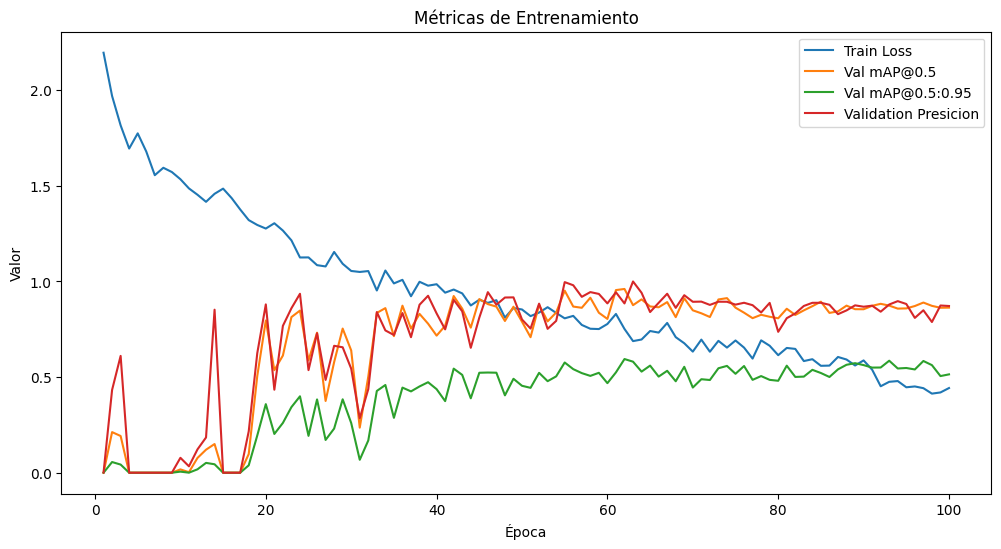

In [13]:
print(df_metrics.columns.to_list())
# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Presicion')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de Entrenamiento')
plt.legend()
plt.show()

In [14]:
# Evaluar el modelo
results = model.val()

# Mostrar los resultados
print(results)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 982.0±219.3 MB/s, size: 27.5 KB)


val: Scanning /content/DetecPSD-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


                   all         19         19      0.885      0.895      0.961      0.598
Speed: 4.4ms preprocess, 53.8ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to proyecto_detec_psd/entrenamiento_detec_psd2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca360905f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031

In [15]:
# Cargar el modelo entrenado
# modelo_entrenado = YOLO("/content/yolov8n.pt")
modelo_entrenado = YOLO("/content/proyecto_detec_psd/entrenamiento_detec_psd/weights/best.pt")

# Realizar inferencia en una imagen
resultados = modelo_entrenado.predict(source="/content/SONAR-CUERPO.jpeg", save=True)

# Acceder a los resultados
for resultado in resultados:
    print(f"Predicciones para la imagen: {resultado.path}")

    for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
        print(f"Bounding Box: {caja} - Confianza: {conf} - Clase: {clase}")


image 1/1 /content/SONAR-CUERPO.jpeg: 480x640 1 cuerpo, 54.9ms
Speed: 4.0ms preprocess, 54.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
Predicciones para la imagen: /content/SONAR-CUERPO.jpeg
Bounding Box: tensor([260.6159, 305.7865, 603.1578, 650.7900], device='cuda:0') - Confianza: 0.5065839290618896 - Clase: 0.0


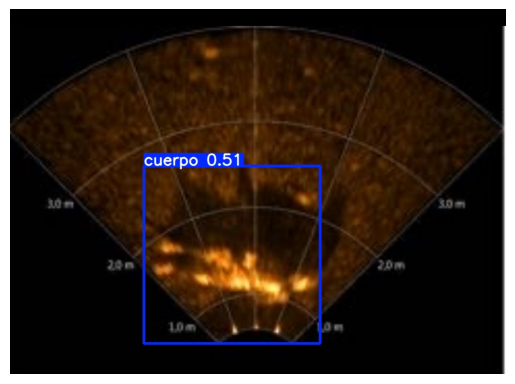

In [16]:
# Cargar y mostrar la imagen con las predicciones
img = Image.open("/content/runs/detect/predict/SONAR-CUERPO.jpg")
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [17]:
import shutil
from google.colab import files

# Especifica el nombre de la carpeta que deseas comprimir y descargar
folder_path = "/content/proyecto_detec_psd"  # Ruta de la carpeta en Colab
output_filename = "modelo_proyecto_detec_psd_v1.zip"   # Nombre del archivo zip de salida

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Descargar el archivo ZIP
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>